In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker


In [2]:
df = pd.read_csv('Sales Transaction v.4a.csv')


In [3]:
df


,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom
...,...,...,...,...,...,...,...,...
536345,C536548,12/1/2018,22168,Organiser Wood Antique White,18.96,-2,12472.0,Germany
536346,C536548,12/1/2018,21218,Red Spotty Biscuit Tin,14.09,-3,12472.0,Germany
536347,C536548,12/1/2018,20957,Porcelain Hanging Bell Small,11.74,-1,12472.0,Germany
536348,C536548,12/1/2018,22580,Advent Calendar Gingham Sack,16.35,-4,12472.0,Germany


In [4]:
##### basic data exploration #####

In [5]:
df.Country.unique()

array(['United Kingdom', 'Norway', 'Belgium', 'Germany', 'France',
       'Austria', 'Netherlands', 'EIRE', 'USA', 'Channel Islands',
       'Iceland', 'Portugal', 'Spain', 'Finland', 'Italy', 'Greece',
       'Japan', 'Sweden', 'Denmark', 'Cyprus', 'Malta', 'Switzerland',
       'Australia', 'Czech Republic', 'Poland', 'Hong Kong', 'Singapore',
       'RSA', 'Israel', 'Unspecified', 'United Arab Emirates', 'Canada',
       'European Community', 'Bahrain', 'Brazil', 'Saudi Arabia',
       'Lebanon', 'Lithuania'], dtype=object)

In [6]:
df.shape

(536350, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536350 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionNo  536350 non-null  object 
 1   Date           536350 non-null  object 
 2   ProductNo      536350 non-null  object 
 3   ProductName    536350 non-null  object 
 4   Price          536350 non-null  float64
 5   Quantity       536350 non-null  int64  
 6   CustomerNo     536295 non-null  float64
 7   Country        536350 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.7+ MB


In [8]:
df.describe()

,Price,Quantity,CustomerNo
count,536350.000000,536350.000000,536295.000000
mean,12.662182,9.919347,15227.893178
std,8.490450,216.662300,1716.582932
min,5.130000,-80995.000000,12004.000000
25%,10.990000,1.000000,13807.000000
50%,11.940000,3.000000,15152.000000
75%,14.090000,10.000000,16729.000000
max,660.620000,80995.000000,18287.000000


In [9]:
df.Quantity

0         12
1         36
2         12
3         12
4          6
          ..
536345    -2
536346    -3
536347    -1
536348    -4
536349    -2
Name: Quantity, Length: 536350, dtype: int64

In [10]:
df.isnull().sum() / df.shape[0]

TransactionNo    0.000000
Date             0.000000
ProductNo        0.000000
ProductName      0.000000
Price            0.000000
Quantity         0.000000
CustomerNo       0.000103
Country          0.000000
dtype: float64

In [11]:
##### Data Cleaning and feature engineering 

In [12]:
### Eleminating rows with null values
df= df.dropna(axis=0,subset='CustomerNo')

In [13]:
df.isnull().sum()

TransactionNo    0
Date             0
ProductNo        0
ProductName      0
Price            0
Quantity         0
CustomerNo       0
Country          0
dtype: int64

In [14]:
df.Country.unique()
df.Country = df.Country.apply(lambda x : 'UAE' if  'United Arab Emirates' in x else x)


C:\Users\farou\AppData\Local\Temp\ipykernel_744\3159052255.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Country = df.Country.apply(lambda x : 'UAE' if  'United Arab Emirates' in x else x)


In [15]:
df.Date.values

array(['12/9/2019', '12/9/2019', '12/9/2019', ..., '12/1/2018',
       '12/1/2018', '12/1/2018'], dtype=object)

In [16]:
### Setting the Date column to datetime format
date_format= "%m/%d/%Y"
df["Date"]= pd.to_datetime(df["Date"],format= date_format)
df.info()

C:\Users\farou\AppData\Local\Temp\ipykernel_744\2866194280.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Date"]= pd.to_datetime(df["Date"],format= date_format)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 536295 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   TransactionNo  536295 non-null  object        
 1   Date           536295 non-null  datetime64[ns]
 2   ProductNo      536295 non-null  object        
 3   ProductName    536295 non-null  object        
 4   Price          536295 non-null  float64       
 5   Quantity       536295 non-null  int64         
 6   CustomerNo     536295 non-null  float64       
 7   Country        536295 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.8+ MB


In [17]:
#### creating two seperate columns Year and month from Date
df["Month"]=  pd.DatetimeIndex(df['Date']).month
df["Year"]=df.Date.apply(lambda x :x.strftime('%Y') )
df.info()

C:\Users\farou\AppData\Local\Temp\ipykernel_744\3645059031.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Month"]=  pd.DatetimeIndex(df['Date']).month
C:\Users\farou\AppData\Local\Temp\ipykernel_744\3645059031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Year"]=df.Date.apply(lambda x :x.strftime('%Y') )


<class 'pandas.core.frame.DataFrame'>
Int64Index: 536295 entries, 0 to 536349
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   TransactionNo  536295 non-null  object        
 1   Date           536295 non-null  datetime64[ns]
 2   ProductNo      536295 non-null  object        
 3   ProductName    536295 non-null  object        
 4   Price          536295 non-null  float64       
 5   Quantity       536295 non-null  int64         
 6   CustomerNo     536295 non-null  float64       
 7   Country        536295 non-null  object        
 8   Month          536295 non-null  int64         
 9   Year           536295 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 45.0+ MB


In [18]:
###creating a month name column

df["MonthName"]=df.Date.apply(lambda x : x.strftime('%B'))

C:\Users\farou\AppData\Local\Temp\ipykernel_744\4027938272.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["MonthName"]=df.Date.apply(lambda x : x.strftime('%B'))


In [19]:
### creating Totalrevenue attribute per transaction

df["Totalrevenue"]=df["Price"]*df["Quantity"]
df.Totalrevenue = df.Totalrevenue.apply(lambda x : x if x >= 0 else 0)

df.Month.unique()

C:\Users\farou\AppData\Local\Temp\ipykernel_744\279044299.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Totalrevenue"]=df["Price"]*df["Quantity"]
C:\Users\farou\AppData\Local\Temp\ipykernel_744\279044299.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Totalrevenue = df.Totalrevenue.apply(lambda x : x if x >= 0 else 0)


array([12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1], dtype=int64)

In [20]:
### creating Region attribute per transaction

europe =['United Kingdom', 'Norway', 'Belgium', 'Germany', 'France',
       'Austria', 'Netherlands', 'EIRE',  'Channel Islands',
       'Iceland', 'Portugal', 'Spain', 'Finland', 'Italy', 'Greece',
        'Sweden', 'Denmark', 'Cyprus', 'Malta', 'Switzerland', 'Czech Republic', 'Poland', 
       'European Community', 'Lithuania']

africa= 'RSA'
asia_Oceania=  ['Australia',  'Hong Kong', 'Singapore',
        'Israel',  'UAE', 'Japan',
        'Bahrain',  'Saudi Arabia',
       'Lebanon']     
america=[ 'USA',  'Canada', 'Brazil']
unspecified="Unspecified"
def region(Country):
    if Country in europe:
        return "Europe"
    elif Country in africa:
        return "Africa"
    elif Country in  asia_Oceania :
        return "Asia/Oceania"
    elif Country in america :
        return "America"
    else :
        return " Unspecified"
    
df['Region'] = df['Country'].apply(region)
    

C:\Users\farou\AppData\Local\Temp\ipykernel_744\2171914246.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Region'] = df['Country'].apply(region)


In [21]:
df.Region.unique()

array(['Europe', 'America', 'Asia/Oceania', 'Africa', ' Unspecified'],
      dtype=object)

In [22]:
###creating two seperate data frames for confirmed and cancelled orders 

df2=df[~(df.Quantity<0)]
df3=df[~(df.Quantity>0)]

In [23]:
### fonction to convert pivot table to a data frame
def pivot_to_df(pivot):
    table=pd.DataFrame(pivot.to_records())
    return table

In [24]:
######### Exploratory Data Analysis ##########



In [25]:
pd.pivot_table(df,index= ["ProductNo","ProductName"], values="Totalrevenue",aggfunc = 'sum').sort_values("Totalrevenue", ascending= False)

,,Totalrevenue
ProductNo,ProductName,
23843,Paper Craft Little Birdie,1002718.10
23166,Medium Ceramic Top Storage Jar,881990.18
22197,Popcorn Holder,587433.94
84077,World War 2 Gliders Asstd Designs,569735.39
85123A,Cream Hanging Heart T-Light Holder,484592.69
...,...,...
85023C,Pink Large Jeweled Photoframe,0.00
79320,Flamingo Lights,0.00
85063,Cream Sweetheart Magazine Rack,0.00


In [26]:
top10prod=pd.pivot_table(df,index= "ProductName", values="Totalrevenue",aggfunc = 'sum').sort_values("Totalrevenue", ascending= False).head(10)
top10prod

,Totalrevenue
ProductName,
Paper Craft Little Birdie,1002718.10
Medium Ceramic Top Storage Jar,881990.18
Popcorn Holder,587433.94
World War 2 Gliders Asstd Designs,569735.39
Cream Hanging Heart T-Light Holder,484592.69
Assorted Colour Bird Ornament,421318.74
Pack Of 72 Retrospot Cake Cases,391485.03
Rabbit Night Light,329029.89
Regency Cakestand 3 Tier,307483.85


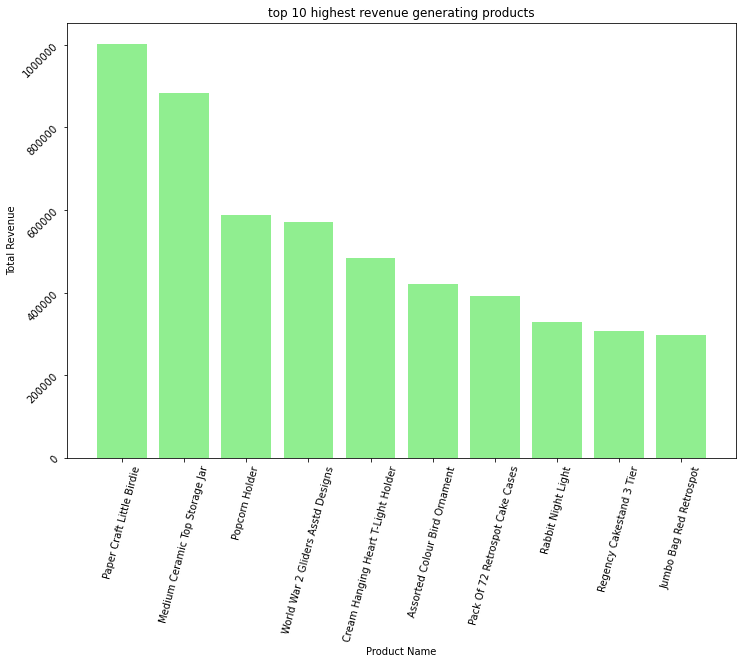

In [27]:

dftop10prod=pd.DataFrame(top10prod.to_records())

plt.figure(figsize = (12,8))
plt.bar(data = dftop10prod, x = 'ProductName',height = 'Totalrevenue', color = 'lightgreen')
plt.title('top 10 highest revenue generating products')
plt.yticks(rotation = 45)
plt.xticks(rotation = 75)
plt.xlabel('Product Name')
plt.ylabel('Total Revenue')
plt.ticklabel_format(style="plain",axis='y')
plt.show()

In [28]:

bestsellers=pd.pivot_table(df2,index='ProductName',values="Quantity",aggfunc='sum').sort_values("Quantity", ascending = False).head(10)
bestsellers

,Quantity
ProductName,
Paper Craft Little Birdie,80995
Medium Ceramic Top Storage Jar,78033
Popcorn Holder,56921
World War 2 Gliders Asstd Designs,55047
Jumbo Bag Red Retrospot,48478
Cream Hanging Heart T-Light Holder,37956
Pack Of 72 Retrospot Cake Cases,36515
Assorted Colour Bird Ornament,36493
Rabbit Night Light,30788


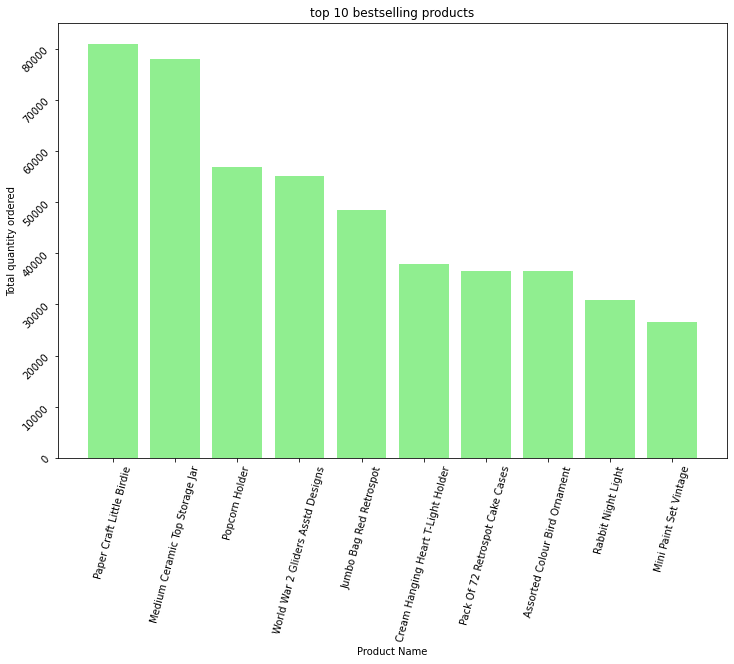

In [29]:
dfbestsellers=pd.DataFrame(bestsellers.to_records())

plt.figure(figsize = (12,8))
plt.bar(data = dfbestsellers, x = 'ProductName',height = 'Quantity', color = 'lightgreen')
plt.title('top 10 bestselling products')
plt.yticks(rotation = 45)
plt.xticks(rotation = 75)
plt.xlabel('Product Name')
plt.ylabel('Total quantity ordered')
plt.ticklabel_format(style="plain",axis='y')
plt.show()

In [30]:
mostordered=pd.pivot_table(df2,index= "ProductName", values="TransactionNo",aggfunc = 'count').sort_values("TransactionNo", ascending= False).head(10)
mostordered

,TransactionNo
ProductName,
Cream Hanging Heart T-Light Holder,2336
Jumbo Bag Red Retrospot,2115
Regency Cakestand 3 Tier,2019
Party Bunting,1708
Lunch Bag Red Retrospot,1597
Assorted Colour Bird Ornament,1491
Popcorn Holder,1426
Set Of 3 Cake Tins Pantry Design,1399
Pack Of 72 Retrospot Cake Cases,1373


In [31]:
df3=df[~(df.Quantity>0)]
mostcancelled=pd.pivot_table(df3,index= "ProductName", values=["TransactionNo"],aggfunc = 'count').sort_values("TransactionNo", ascending= False).head(10)
mostcancelled

,TransactionNo
ProductName,
Regency Cakestand 3 Tier,181
Jam Making Set With Jars,86
Set Of 3 Cake Tins Pantry Design,73
Strawberry Ceramic Trinket Pot,61
Roses Regency Teacup And Saucer,53
Popcorn Holder,50
Recipe Box Pantry Yellow Design,47
Wood 2 Drawer Cabinet White Finish,45
Jumbo Bag Red Retrospot,44


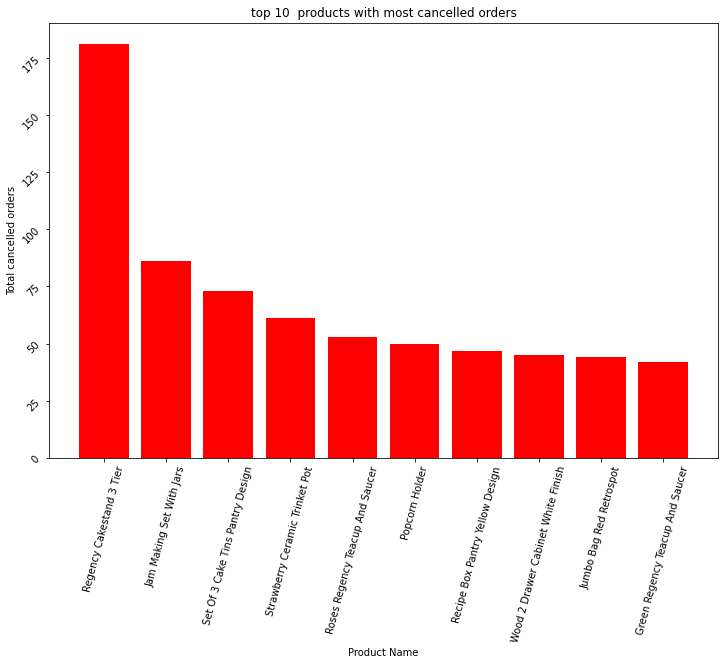

In [32]:
dfmostcancelled=pd.DataFrame(mostcancelled.to_records())
plt.figure(figsize = (12,8))
plt.bar(data = dfmostcancelled, x = 'ProductName',height = 'TransactionNo', color = 'red')
plt.title('top 10  products with most cancelled orders')
plt.yticks(rotation = 45)
plt.xticks(rotation = 75)
plt.xlabel('Product Name')
plt.ylabel('Total cancelled orders')
plt.ticklabel_format(style="plain",axis='y')
plt.show()

In [33]:
bestyear=pd.pivot_table(df2,index= "Year", values="Totalrevenue",aggfunc = 'sum').sort_values("Totalrevenue", ascending= False)
bestyear



,Totalrevenue
Year,
2019,58550476.82
2018,4415415.52


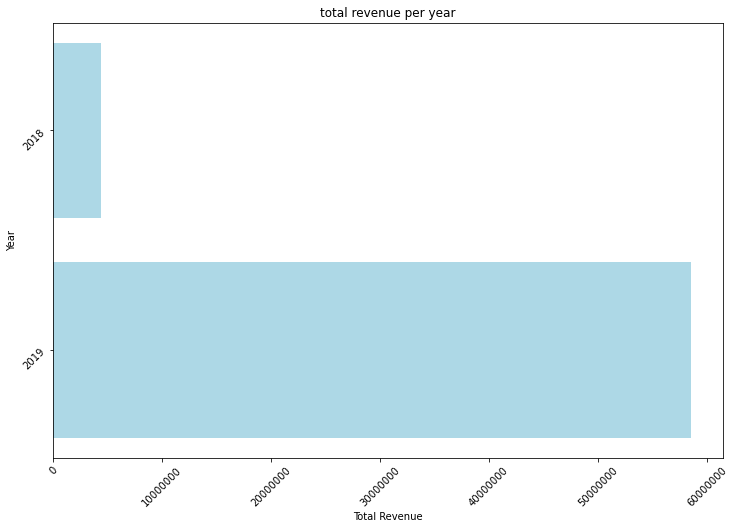

In [34]:
dfbestyear=pd.DataFrame(bestyear.to_records())
dfbestyear.Year= dfbestyear.Year.apply(lambda x : str(x))
plt.figure(figsize = (12,8))
plt.barh(data = dfbestyear, width = 'Totalrevenue',y = 'Year', color = 'lightblue')
plt.title('total revenue per year')
plt.yticks(rotation = 45)
plt.xticks(rotation = 45)
plt.xlabel('Total Revenue')
plt.ylabel('Year')
plt.ticklabel_format(style="plain",axis='x')
plt.show()



In [57]:
pd.pivot_table(df2,index= "ProductName", values="TransactionNo",aggfunc = 'count').sort_values("TransactionNo", ascending= False).head(10)

,TransactionNo
ProductName,
Cream Hanging Heart T-Light Holder,2336
Jumbo Bag Red Retrospot,2115
Regency Cakestand 3 Tier,2019
Party Bunting,1708
Lunch Bag Red Retrospot,1597
Assorted Colour Bird Ornament,1491
Popcorn Holder,1426
Set Of 3 Cake Tins Pantry Design,1399
Pack Of 72 Retrospot Cake Cases,1373


In [36]:
max_countries=pd.pivot_table(df2,index= "Country", values="Totalrevenue",aggfunc = 'sum').sort_values("Totalrevenue", ascending= False).head(10)
max_countries

,Totalrevenue
Country,
United Kingdom,52524576.47
Netherlands,2151553.59
EIRE,1713410.95
Germany,1371543.27
France,1330652.89
Australia,995607.91
Sweden,401879.89
Switzerland,361969.25
Japan,293155.44


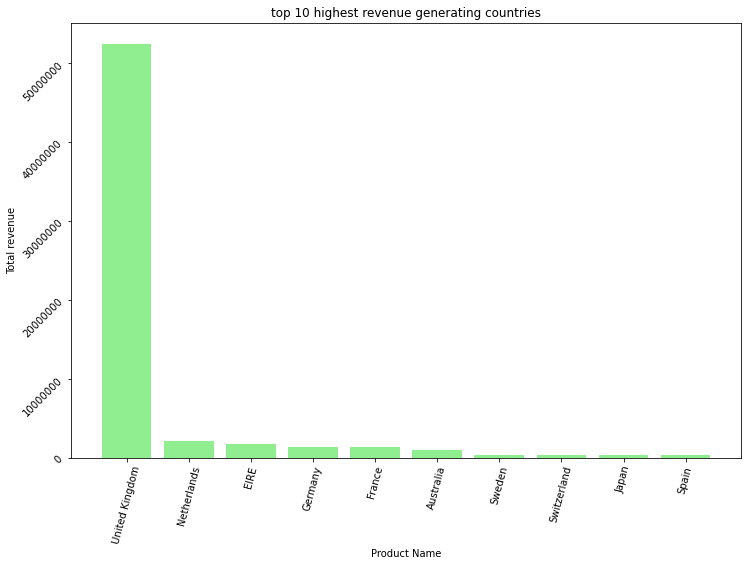

In [37]:
dfmax_countries=pd.DataFrame(max_countries.to_records())


plt.figure(figsize = (12,8))
plt.bar(data = dfmax_countries, x = 'Country',height = 'Totalrevenue', color = 'lightgreen')
plt.title('top 10 highest revenue generating countries')
plt.yticks(rotation = 45)
plt.xticks(rotation = 75)
plt.xlabel('Product Name')
plt.ylabel('Total revenue')
plt.ticklabel_format(style="plain",axis='y')
plt.show()

In [38]:

df_2018=df2[df2.Year=="2018"]

maxrevenue_2018=pd.pivot_table(df_2018,index="Country",values="Totalrevenue",aggfunc="sum").sort_values("Totalrevenue",ascending=False).head(10)
maxrevenue_2018

,Totalrevenue
Country,
United Kingdom,3813374.14
Germany,100750.54
France,92026.61
EIRE,77979.16
Netherlands,75837.44
Japan,49485.83
Sweden,43407.60
Belgium,42667.95
Norway,40596.60


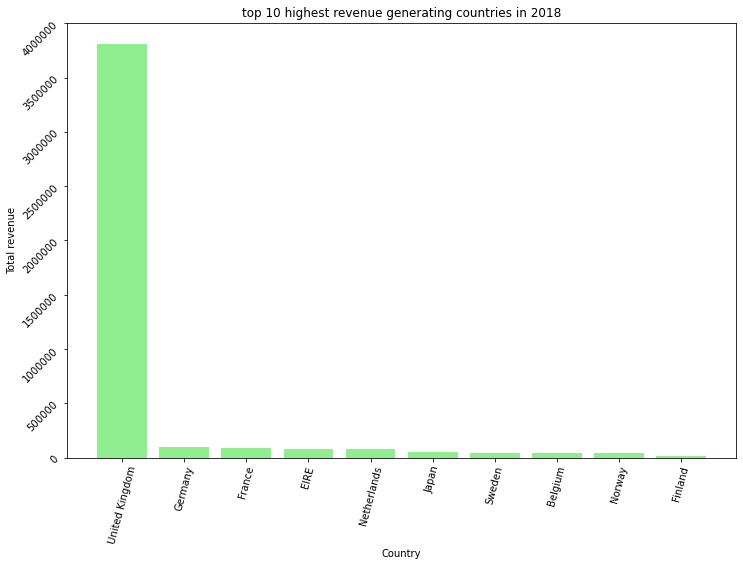

In [39]:
dfmaxrevenue2018=pd.DataFrame(maxrevenue_2018.to_records())
plt.figure(figsize = (12,8))
plt.bar(data = dfmaxrevenue2018, x = 'Country',height = 'Totalrevenue', color = 'lightgreen')
plt.title('top 10 highest revenue generating countries in 2018')
plt.yticks(rotation = 45)
plt.xticks(rotation = 75)
plt.xlabel('Country')
plt.ylabel('Total revenue')
plt.ticklabel_format(style="plain",axis='y')
plt.show()

In [40]:

df_2019=df2[df2.Year=='2019']
maxrevenue_2019=pd.pivot_table(df_2019,index="Country",values="Totalrevenue",aggfunc="sum").sort_values("Totalrevenue",ascending=False).head(10)
maxrevenue_2019


,Totalrevenue
Country,
United Kingdom,48711202.33
Netherlands,2075716.15
EIRE,1635431.79
Germany,1270792.73
France,1238626.28
Australia,989883.72
Sweden,358472.29
Switzerland,352883.87
Spain,276363.28


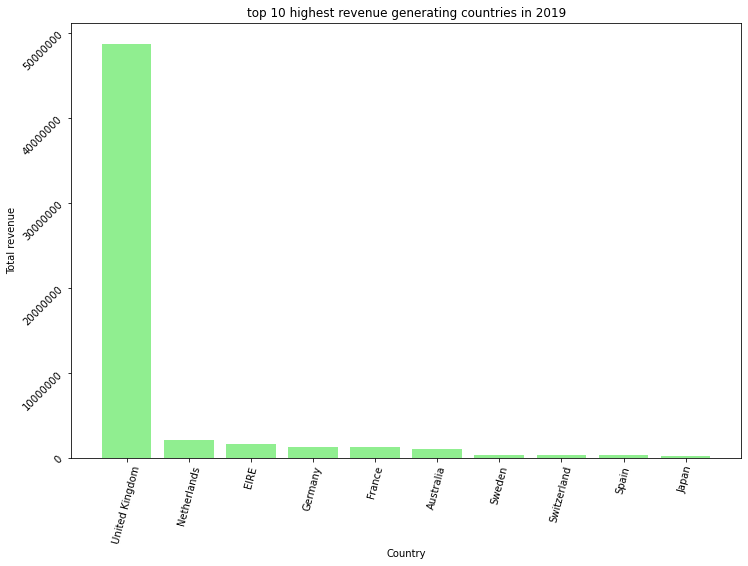

In [41]:
dfmaxrevenue2019=pd.DataFrame(maxrevenue_2019.to_records())
plt.figure(figsize = (12,8))
plt.bar(data = dfmaxrevenue2019, x = 'Country',height = 'Totalrevenue', color = 'lightgreen')
plt.title('top 10 highest revenue generating countries in 2019')
plt.yticks(rotation = 45)
plt.xticks(rotation = 75)
plt.xlabel('Country')
plt.ylabel('Total revenue')
plt.ticklabel_format(style="plain",axis='y')
plt.show()

In [42]:
regionrevenue=pd.pivot_table(df2,index="Region",values="Totalrevenue",aggfunc="sum").sort_values("Totalrevenue",ascending=False)
regionrevenue

,Totalrevenue
Region,
Europe,61404043.53
Asia/Oceania,1456878.10
America,68011.83
Unspecified,32699.05
Africa,4259.83


In [43]:
dfregionrevenue=pd.DataFrame(regionrevenue.to_records())
dfregionrevenue["Percentage"]=dfregionrevenue.Totalrevenue.apply(lambda x: round((x/dfregionrevenue.Totalrevenue.sum())*100,2))

In [44]:
dfregionrevenue

,Region,Totalrevenue,Percentage
0,Europe,61404043.53,97.52
1,Asia/Oceania,1456878.10,2.31
2,America,68011.83,0.11
3,Unspecified,32699.05,0.05
4,Africa,4259.83,0.01


In [45]:
dfeu=df[df.Region=="Europe"]
pd.pivot_table(dfeu,index=["Region","ProductName"],values="Totalrevenue",aggfunc="sum").sort_values("Totalrevenue",ascending=False).head(10)

Totalrevenue
Region ProductName                                     
Europe Paper Craft Little Birdie             1002718.10
       Medium Ceramic Top Storage Jar         879528.49
       Popcorn Holder                         583674.62
       World War 2 Gliders Asstd Designs      559665.96
       Cream Hanging Heart T-Light Holder     483809.61
       Assorted Colour Bird Ornament          420959.34
       Pack Of 72 Retrospot Cake Cases        386377.70
       Regency Cakestand 3 Tier               300703.23
       Jumbo Bag Red Retrospot                295584.45
       Party Bunting                          279536.91

In [46]:
pd.pivot_table(df[df.Region=="Asia/Oceania"],index=["Region","ProductName"],values="Totalrevenue",aggfunc="sum").sort_values("Totalrevenue",ascending=False).head(10)

Totalrevenue
Region       ProductName                                    
Asia/Oceania Rabbit Night Light                     54934.56
             Mini Paint Set Vintage                 38942.76
             Round Snack Boxes Set Of 4 Fruits      20011.50
             Red Harmonica In Box                   19743.00
             Red Toadstool Led Night Light          17650.80
             Dolly Girl Lunch Box                   13333.52
             Homemade Jam Scented Candles           13302.72
             Pack Of 12 Traditional Crayons         12766.20
             Mini Jigsaw Spaceboy                   12765.78
             Spaceboy Lunch Box                     12544.86

In [47]:
pd.pivot_table(df[df.Region=="America"],index=["Region","ProductName"],values="Totalrevenue",aggfunc="sum").sort_values("Totalrevenue",ascending=False).head(10)

Totalrevenue
Region  ProductName                                      
America Retro Coffee Mugs Assorted                5715.36
        World War 2 Gliders Asstd Designs         3015.36
        Set/10 Pink Polkadot Party Candles         830.16
        Set/10 Blue Polkadot Party Candles         830.16
        Set/10 Ivory Polkadot Party Candles        830.16
        Set/10 Red Polkadot Party Candles          830.16
        Charlotte Bag Suki Design                  676.81
        Colouring Pencils Brown Tube               666.60
        Regency Cakestand 3 Tier                   648.38
        Set Of 12 Fairy Cake Baking Cases          621.60

In [48]:

erevenue=pd.pivot_table(df2[~(df.Quantity)<0],index=["Year",'Month','MonthName'],values="Totalrevenue",aggfunc="sum").sort_values(["Year","Month"])
eprice=pd.pivot_table(df2[~(df.Quantity)<0],index=["Year",'Month','MonthName'],values="Price",aggfunc="mean").sort_values(["Year","Month"])


C:\Users\farou\AppData\Local\Temp\ipykernel_744\468168294.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  erevenue=pd.pivot_table(df2[~(df.Quantity)<0],index=["Year",'Month','MonthName'],values="Totalrevenue",aggfunc="sum").sort_values(["Year","Month"])
C:\Users\farou\AppData\Local\Temp\ipykernel_744\468168294.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  eprice=pd.pivot_table(df2[~(df.Quantity)<0],index=["Year",'Month','MonthName'],values="Price",aggfunc="mean").sort_values(["Year","Month"])


In [49]:
df_erevenue= pivot_to_df(erevenue)
df_eprice= pivot_to_df(eprice)
df_eprice

,Year,Month,MonthName,Price
0,2018,12,December,14.101136
1,2019,1,January,13.568424
2,2019,2,February,13.672189
3,2019,3,March,13.594603
4,2019,4,April,13.383292
5,2019,5,May,13.290391
6,2019,6,June,13.232658
7,2019,7,July,12.846335
8,2019,8,August,12.895464
9,2019,9,September,12.957153


In [50]:
df_erevenue

,Year,Month,MonthName,Totalrevenue
0,2018,12,December,4415415.52
1,2019,1,January,4559856.37
2,2019,2,February,3335017.18
3,2019,3,March,4398401.60
4,2019,4,April,3589497.88
5,2019,5,May,4578965.08
6,2019,6,June,4494648.81
7,2019,7,July,4593867.06
8,2019,8,August,4758356.02
9,2019,9,September,6628303.06


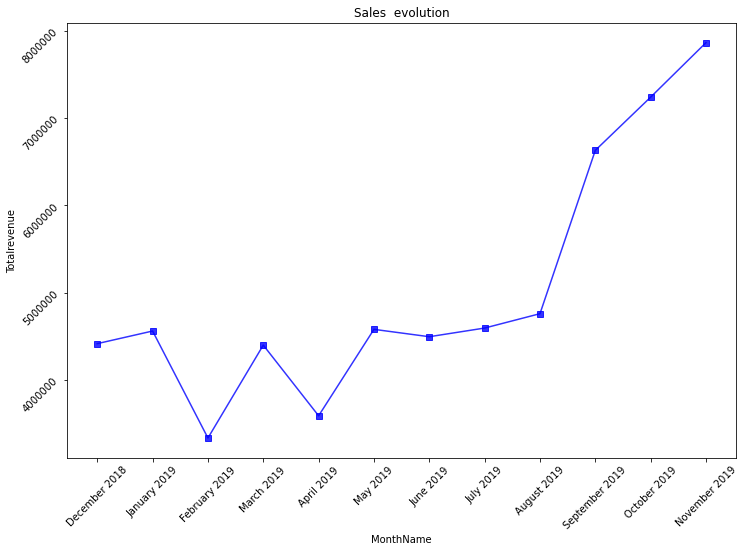

In [51]:

month_year=df_erevenue['MonthName'].map(str) + ' ' + df_erevenue['Year'].map(str)

plt.figure(figsize = (12,8))
plt.plot(month_year[month_year!="December 2019"], df_erevenue.iloc[:12,3], color = 'blue', marker = 's',alpha = 0.8)
plt.title('Sales  evolution')
plt.yticks(rotation = 45)
plt.xticks(rotation = 45)
plt.xlabel('MonthName')
plt.ylabel('Totalrevenue')
plt.ticklabel_format(style="plain",axis='y')
plt.show()

In [52]:
month_year[month_year!="December 2019"]

0      December 2018
1       January 2019
2      February 2019
3         March 2019
4         April 2019
5           May 2019
6          June 2019
7          July 2019
8        August 2019
9     September 2019
10      October 2019
11     November 2019
dtype: object

In [53]:
df2["Quantity"].mean()

10.594678682138229

<AxesSubplot:>

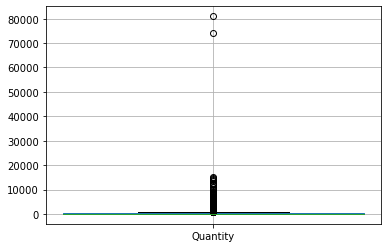

In [68]:
quantity_perT=pd.pivot_table(df2,index="TransactionNo",values="Quantity",aggfunc="sum").sort_values("Quantity",ascending=True)
average_Q=pivot_to_df(quantity_perT)
average_Q["Quantity"].mean()
average_Q.boxplot(column='Quantity',widths= 0.9)

In [55]:
df[df.ProductName=="Paper Craft Little Birdie"]

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,Month,Year,MonthName,Totalrevenue,Region
142,581483,2019-12-09,23843,Paper Craft Little Birdie,12.38,80995,16446.0,United Kingdom,12,2019,December,1002718.1,Europe
1616,C581484,2019-12-09,23843,Paper Craft Little Birdie,6.19,-80995,16446.0,United Kingdom,12,2019,December,0.0,Europe
